# Concrete Compressive Strength Predictive Analysis

This data analysis includes the following steps:

1. Load the data.
2. Complete a "description" of the data.
3. Complete an "exploration" of the data. This is an indepth exploration of the data, using plots.
4. Build models on the data. I chose neural network and linear regression (Lasso).
5. Evaluate the performance of the models using metrics and diagnostics.
6. Describe and interpret the model. I chose the Neural Network, as it performed better.

In [30]:
# import relevant libraries
import pandas as pd
from pandas.plotting import scatter_matrix
import os
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import PowerTransformer

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LassoCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
import seaborn as sns
from sklearn.neural_network import MLPRegressor

import scipy.stats as stats
import random
import math
from sklearn.inspection import permutation_importance

%matplotlib inline

## Step 1: Load The Data Below
(create cells below as needed)

In [8]:
# load the data
file_path = os.path.join(os.getcwd(), 'concrete+compressive+strength', 'Concrete_Data.xls')
concrete_data = pd.read_excel(file_path)

## Step 2: Describe The Data

## Where did the data come from?
https://archive.ics.uci.edu/dataset/165/concrete+compressive+strength 
## How was the data collected?
### (From the data documentation):
#### Sources: 

  Original Owner and Donor
  Prof. I-Cheng Yeh
  Department of Information Management 
  Chung-Hua University, 
  Hsin Chu, Taiwan 30067, R.O.C.
  e-mail:icyeh@chu.edu.tw
  TEL:886-3-5186511

  Date Donated: August 3, 2007
#### Data Characteristics:
    
The actual concrete compressive strength (MPa) for a given mixture under a 
specific age (days) was determined from laboratory. Data is in raw form (not scaled). 

#### Summary Statistics: 

Number of instances (observations): 1030
Number of Attributes: 9
Attribute breakdown: 8 quantitative input variables, and 1 quantitative output variable
Missing Attribute Values: None

## How many rows and columns are there?
There are 9 columns and 1030 rows.

## What are the features?
- Cement
- Blast Furnace Slag
- Fly Ash
- Water
- Superplasticizer
- Coarse Aggregate
- Fine Aggregate
- Age
<br> <br>
All features are continuous except Age, which has 14 categories (ages).

In [9]:
concrete_data.info()
# 9 columns, 1030 rows

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Cement (component 1)(kg in a m^3 mixture)              1030 non-null   float64
 1   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  1030 non-null   float64
 2   Fly Ash (component 3)(kg in a m^3 mixture)             1030 non-null   float64
 3   Water  (component 4)(kg in a m^3 mixture)              1030 non-null   float64
 4   Superplasticizer (component 5)(kg in a m^3 mixture)    1030 non-null   float64
 5   Coarse Aggregate  (component 6)(kg in a m^3 mixture)   1030 non-null   float64
 6   Fine Aggregate (component 7)(kg in a m^3 mixture)      1030 non-null   float64
 7   Age (day)                                              1030 non-null   int64  
 8   Concrete compressive strength(MPa, megapascals)  

In [10]:
concrete_data.describe() # describe for analysis of numerical features

Cement (component 1)(kg in a m^3 mixture)  \
count                                1030.000000   
mean                                  281.165631   
std                                   104.507142   
min                                   102.000000   
25%                                   192.375000   
50%                                   272.900000   
75%                                   350.000000   
max                                   540.000000   

       Blast Furnace Slag (component 2)(kg in a m^3 mixture)  \
count                                        1030.000000       
mean                                           73.895485       
std                                            86.279104       
min                                             0.000000       
25%                                             0.000000       
50%                                            22.000000       
75%                                           142.950000       
max                                           359.400000       

       Fly Ash (component 3)(kg in a m^3 mixture)  \
count                                 1030.000000   
mean                                    54.187136   
std                                     63.996469   
min                                      0.000000   
25%                                      0.000000   
50%                                      0.000000   
75%                                    118.270000   
max                                    200.100000   

       Water  (component 4)(kg in a m^3 mixture)  \
count                                1030.000000   
mean                                  181.566359   
std                                    21.355567   
min                                   121.750000   
25%                                   164.900000   
50%                                   185.000000   
75%                                   192.000000   
max                                   247.000000   

       Superplasticizer (component 5)(kg in a m^3 mixture)  \
count                                        1030.000000     
mean                                            6.203112     
std                                             5.973492     
min                                             0.000000     
25%                                             0.000000     
50%                                             6.350000     
75%                                            10.160000     
max                                            32.200000     

       Coarse Aggregate  (component 6)(kg in a m^3 mixture)  \
count                                        1030.000000      
mean                                          972.918592      
std                                            77.753818      
min                                           801.000000      
25%                                           932.000000      
50%                                           968.000000      
75%                                          1029.400000      
max                                          1145.000000      

       Fine Aggregate (component 7)(kg in a m^3 mixture)    Age (day)  \
count                                        1030.000000  1030.000000   
mean                                          773.578883    45.662136   
std                                            80.175427    63.169912   
min                                           594.000000     1.000000   
25%                                           730.950000     7.000000   
50%                                           779.510000    28.000000   
75%                                           824.000000    56.000000   
max                                           992.600000   365.000000   

       Concrete compressive strength(MPa, megapascals)   
count                                       1030.000000  
mean                                          35.817836  
std                                           16.705679

In [11]:
concrete_data["Age (day)"].unique() 

array([ 28, 270, 365, 360,  90, 180,   3,   7,  56,  91,  14, 100, 120,
         1])

In [12]:
concrete_data["Water  (component 4)(kg in a m^3 mixture)"].unique()

array([162.  , 228.  , 192.  , 146.  , 170.1 , 175.5 , 153.5 , 151.4 ,
       126.6 , 181.1 , 137.8 , 157.9 , 141.8 , 155.7 , 147.4 , 164.9 ,
       183.8 , 153.9 , 144.7 , 186.  , 145.9 , 174.9 , 189.29, 197.89,
       165.62, 162.14, 180.31, 195.47, 161.85, 176.46, 121.75, 181.71,
       181.74, 195.23, 186.66, 187.42, 159.32, 159.35, 159.  , 173.96,
       188.45, 169.59, 170.21, 158.33, 168.08, 160.6 , 171.54, 146.14,
       158.11, 146.25, 143.3 , 159.48, 174.8 , 154.79, 154.61, 160.7 ,
       140.75, 155.63, 158.49, 214.6 , 140.  , 142.  , 145.  , 195.  ,
       165.  , 170.  , 185.  , 175.  , 158.  , 200.  , 167.  , 189.  ,
       190.  , 184.  , 182.  , 163.  , 160.  , 151.  , 163.81, 175.06,
       179.94, 175.46, 156.76, 164.77, 164.03, 172.34, 166.61, 191.84,
       159.21, 170.17, 192.94, 157.  , 210.  , 201.  , 178.  , 168.  ,
       206.  , 179.  , 154.  , 218.  , 185.7 , 197.  , 194.  , 193.  ,
       191.  , 198.  , 180.  , 181.  , 183.  , 187.  , 203.5 , 173.  ,
      

In [13]:
concrete_data['Concrete compressive strength(MPa, megapascals) '].unique()

array([79.98611076, 61.88736576, 40.26953526, 41.05277999, 44.2960751 ,
       47.02984744, 43.6982994 , 36.44776979, 45.85429086, 39.28978986,
       38.07424367, 28.02168359, 43.01296026, 42.32693164, 47.81378165,
       52.90831981, 39.35804798, 56.14196225, 40.56325203, 42.62064842,
       41.8367142 , 28.23748958,  8.06342182, 44.20782217, 52.51669744,
       53.30063166, 41.15137506, 52.1243856 , 37.42751518, 38.60376124,
       55.26012245, 41.71950328, 42.13112046, 53.69225402, 38.40795006,
       30.07976945, 37.72192144, 42.22902605, 36.2519586 , 50.45930106,
       38.99538361, 53.104131  , 41.54299743, 35.07640202, 15.04919265,
       40.75906322, 26.25800398, 32.82319446, 39.77931782, 46.93194184,
       33.11691123, 49.18514941, 14.58931216, 14.63826496, 41.9346198 ,
        9.13142014, 50.94882902, 33.01900564, 54.37828264, 51.73276323,
        9.86640156, 50.65511224, 48.69562145, 55.06431126, 44.6980396 ,
       30.27558064, 40.85696881, 71.98818916, 34.39795764, 28.79

## Step 3: Explore The Data

In [14]:
concrete_data.head()
# Renaming the columns to make my life easier
concrete_df = concrete_data.rename(columns={'Cement (component 1)(kg in a m^3 mixture)': 'Cement', 
                                            'Blast Furnace Slag (component 2)(kg in a m^3 mixture)':'Blast Furnace Slag', 
                                           'Fly Ash (component 3)(kg in a m^3 mixture)':'Fly Ash', 'Water  (component 4)(kg in a m^3 mixture)':'Water', 
                                           'Superplasticizer (component 5)(kg in a m^3 mixture)':'Superplasticizer', 'Coarse Aggregate  (component 6)(kg in a m^3 mixture)':'Coarse Aggregate',
                                            'Fine Aggregate (component 7)(kg in a m^3 mixture)':'Fine Aggregate', 'Age (day)':'Age(day)', 'Concrete compressive strength(MPa, megapascals) ':'Concrete compressive strength'})
concrete_df.head()

Cement  Blast Furnace Slag  Fly Ash  Water  Superplasticizer  \
0   540.0                 0.0      0.0  162.0               2.5   
1   540.0                 0.0      0.0  162.0               2.5   
2   332.5               142.5      0.0  228.0               0.0   
3   332.5               142.5      0.0  228.0               0.0   
4   198.6               132.4      0.0  192.0               0.0   

   Coarse Aggregate  Fine Aggregate  Age(day)  Concrete compressive strength  
0            1040.0           676.0        28                      79.986111  
1            1055.0           676.0        28                      61.887366  
2             932.0           594.0       270                      40.269535  
3             932.0           594.0       365                      41.052780  
4             978.4           825.5       360                      44.296075

In [15]:
# Explore the target column
concrete_df['Concrete compressive strength'].describe()

count    1030.000000
mean       35.817836
std        16.705679
min         2.331808
25%        23.707115
50%        34.442774
75%        46.136287
max        82.599225
Name: Concrete compressive strength, dtype: float64

<Axes: ylabel='Frequency'>

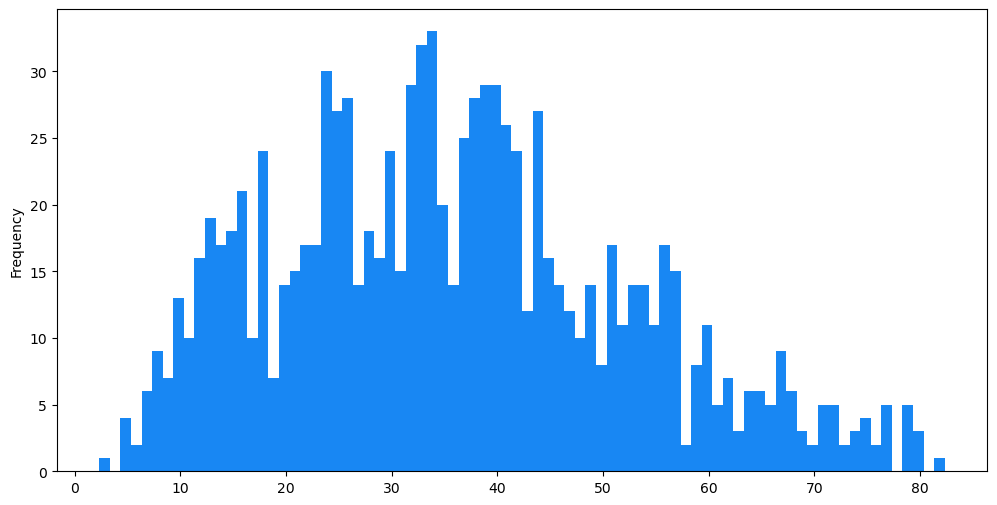

In [16]:
fig, ax = plt.subplots(1, 1, figsize=(12, 6)) # create figure
rgb = (random.random(), random.random(), random.random()) # fun random color 
bins = np.arange(2.331808,82.599225) # bins = to min and max
concrete_df['Concrete compressive strength'].plot(kind='hist', ax=ax, bins=bins, color=rgb) # plot

In [17]:
# to find the ideal number of bins
math.sqrt(1030)

32.09361307176243

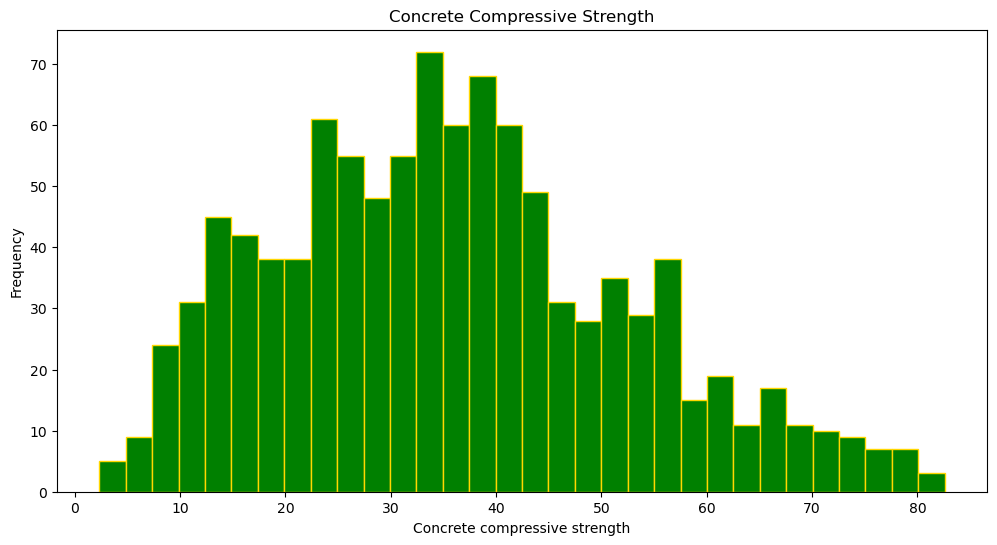

In [18]:
plt.figure(figsize=(12, 6)) # create figure
plt.hist(concrete_df['Concrete compressive strength'], bins=32, color='green', edgecolor='gold') # histogram 
plt.title("Concrete Compressive Strength")
plt.xlabel("Concrete compressive strength")
plt.ylabel("Frequency")
plt.show()

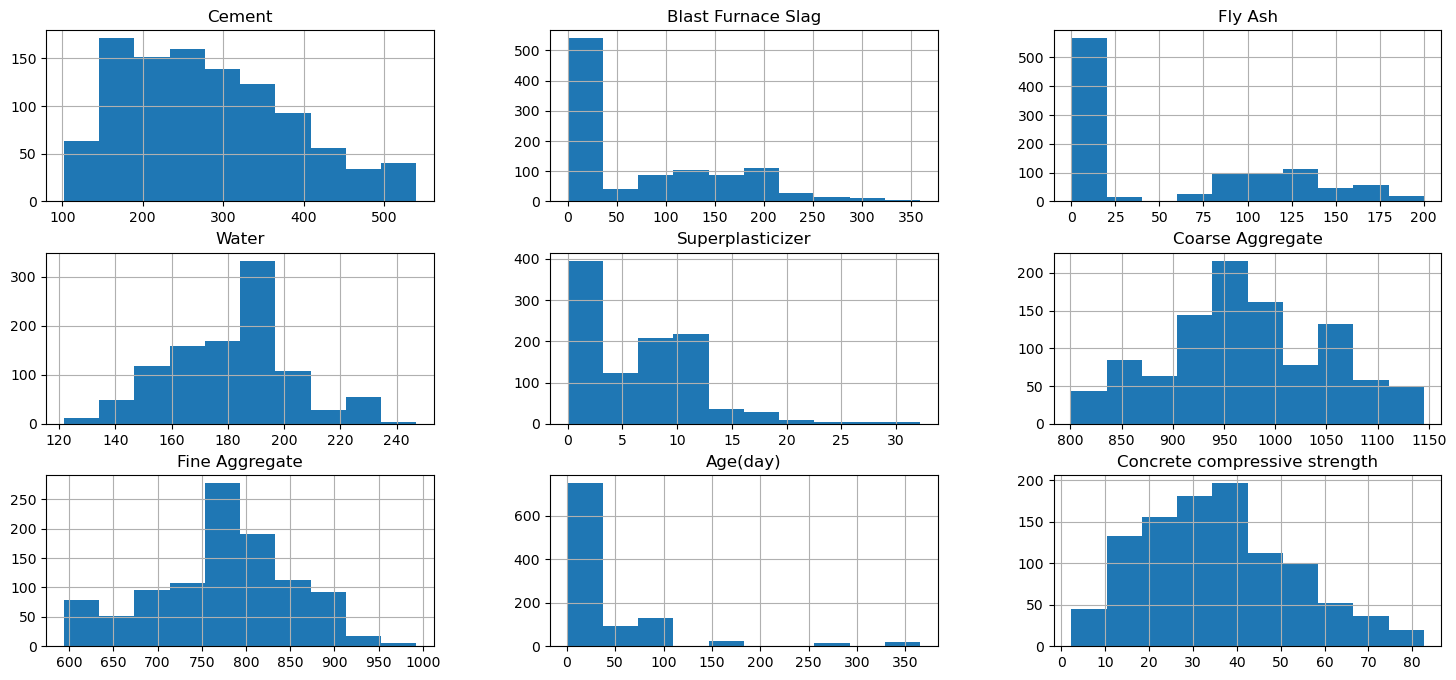

In [19]:
fig, ax1 = plt.subplots(1, 1, figsize=(18, 8))
_ = concrete_df.hist(ax=ax1)

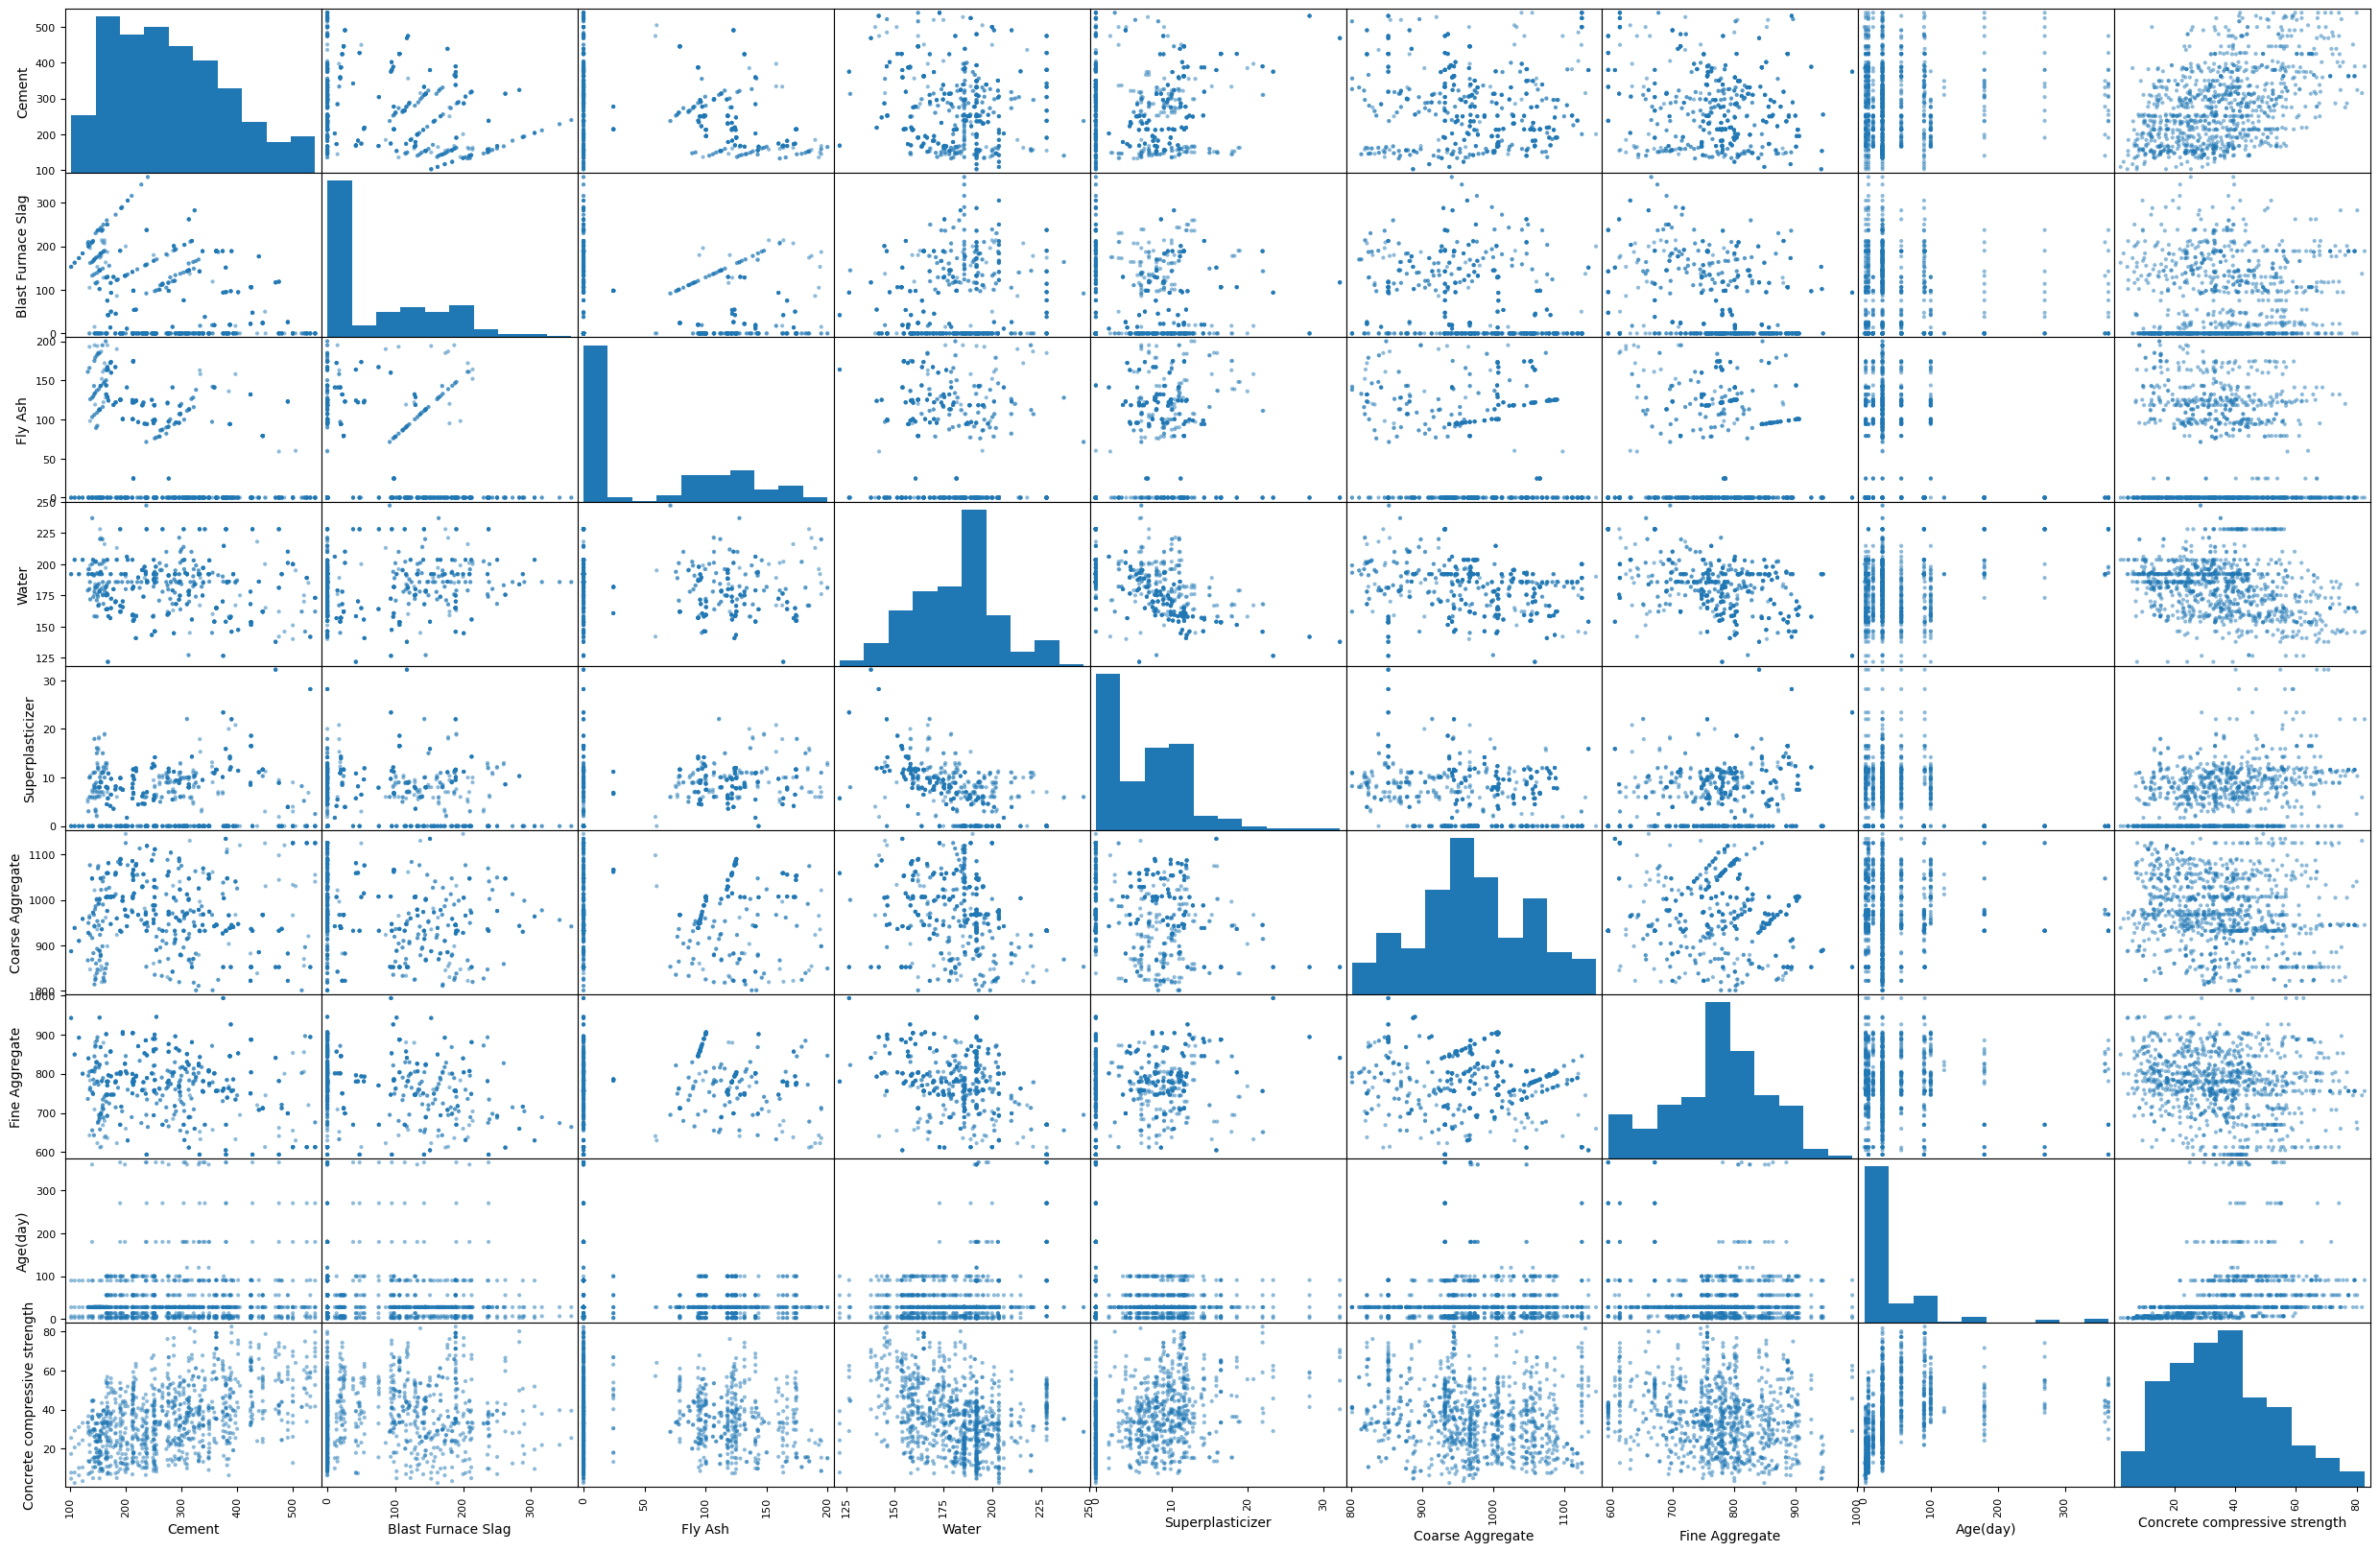

In [20]:
_ = scatter_matrix(concrete_df, figsize=(31,20))
# some are right skewed, so let's log

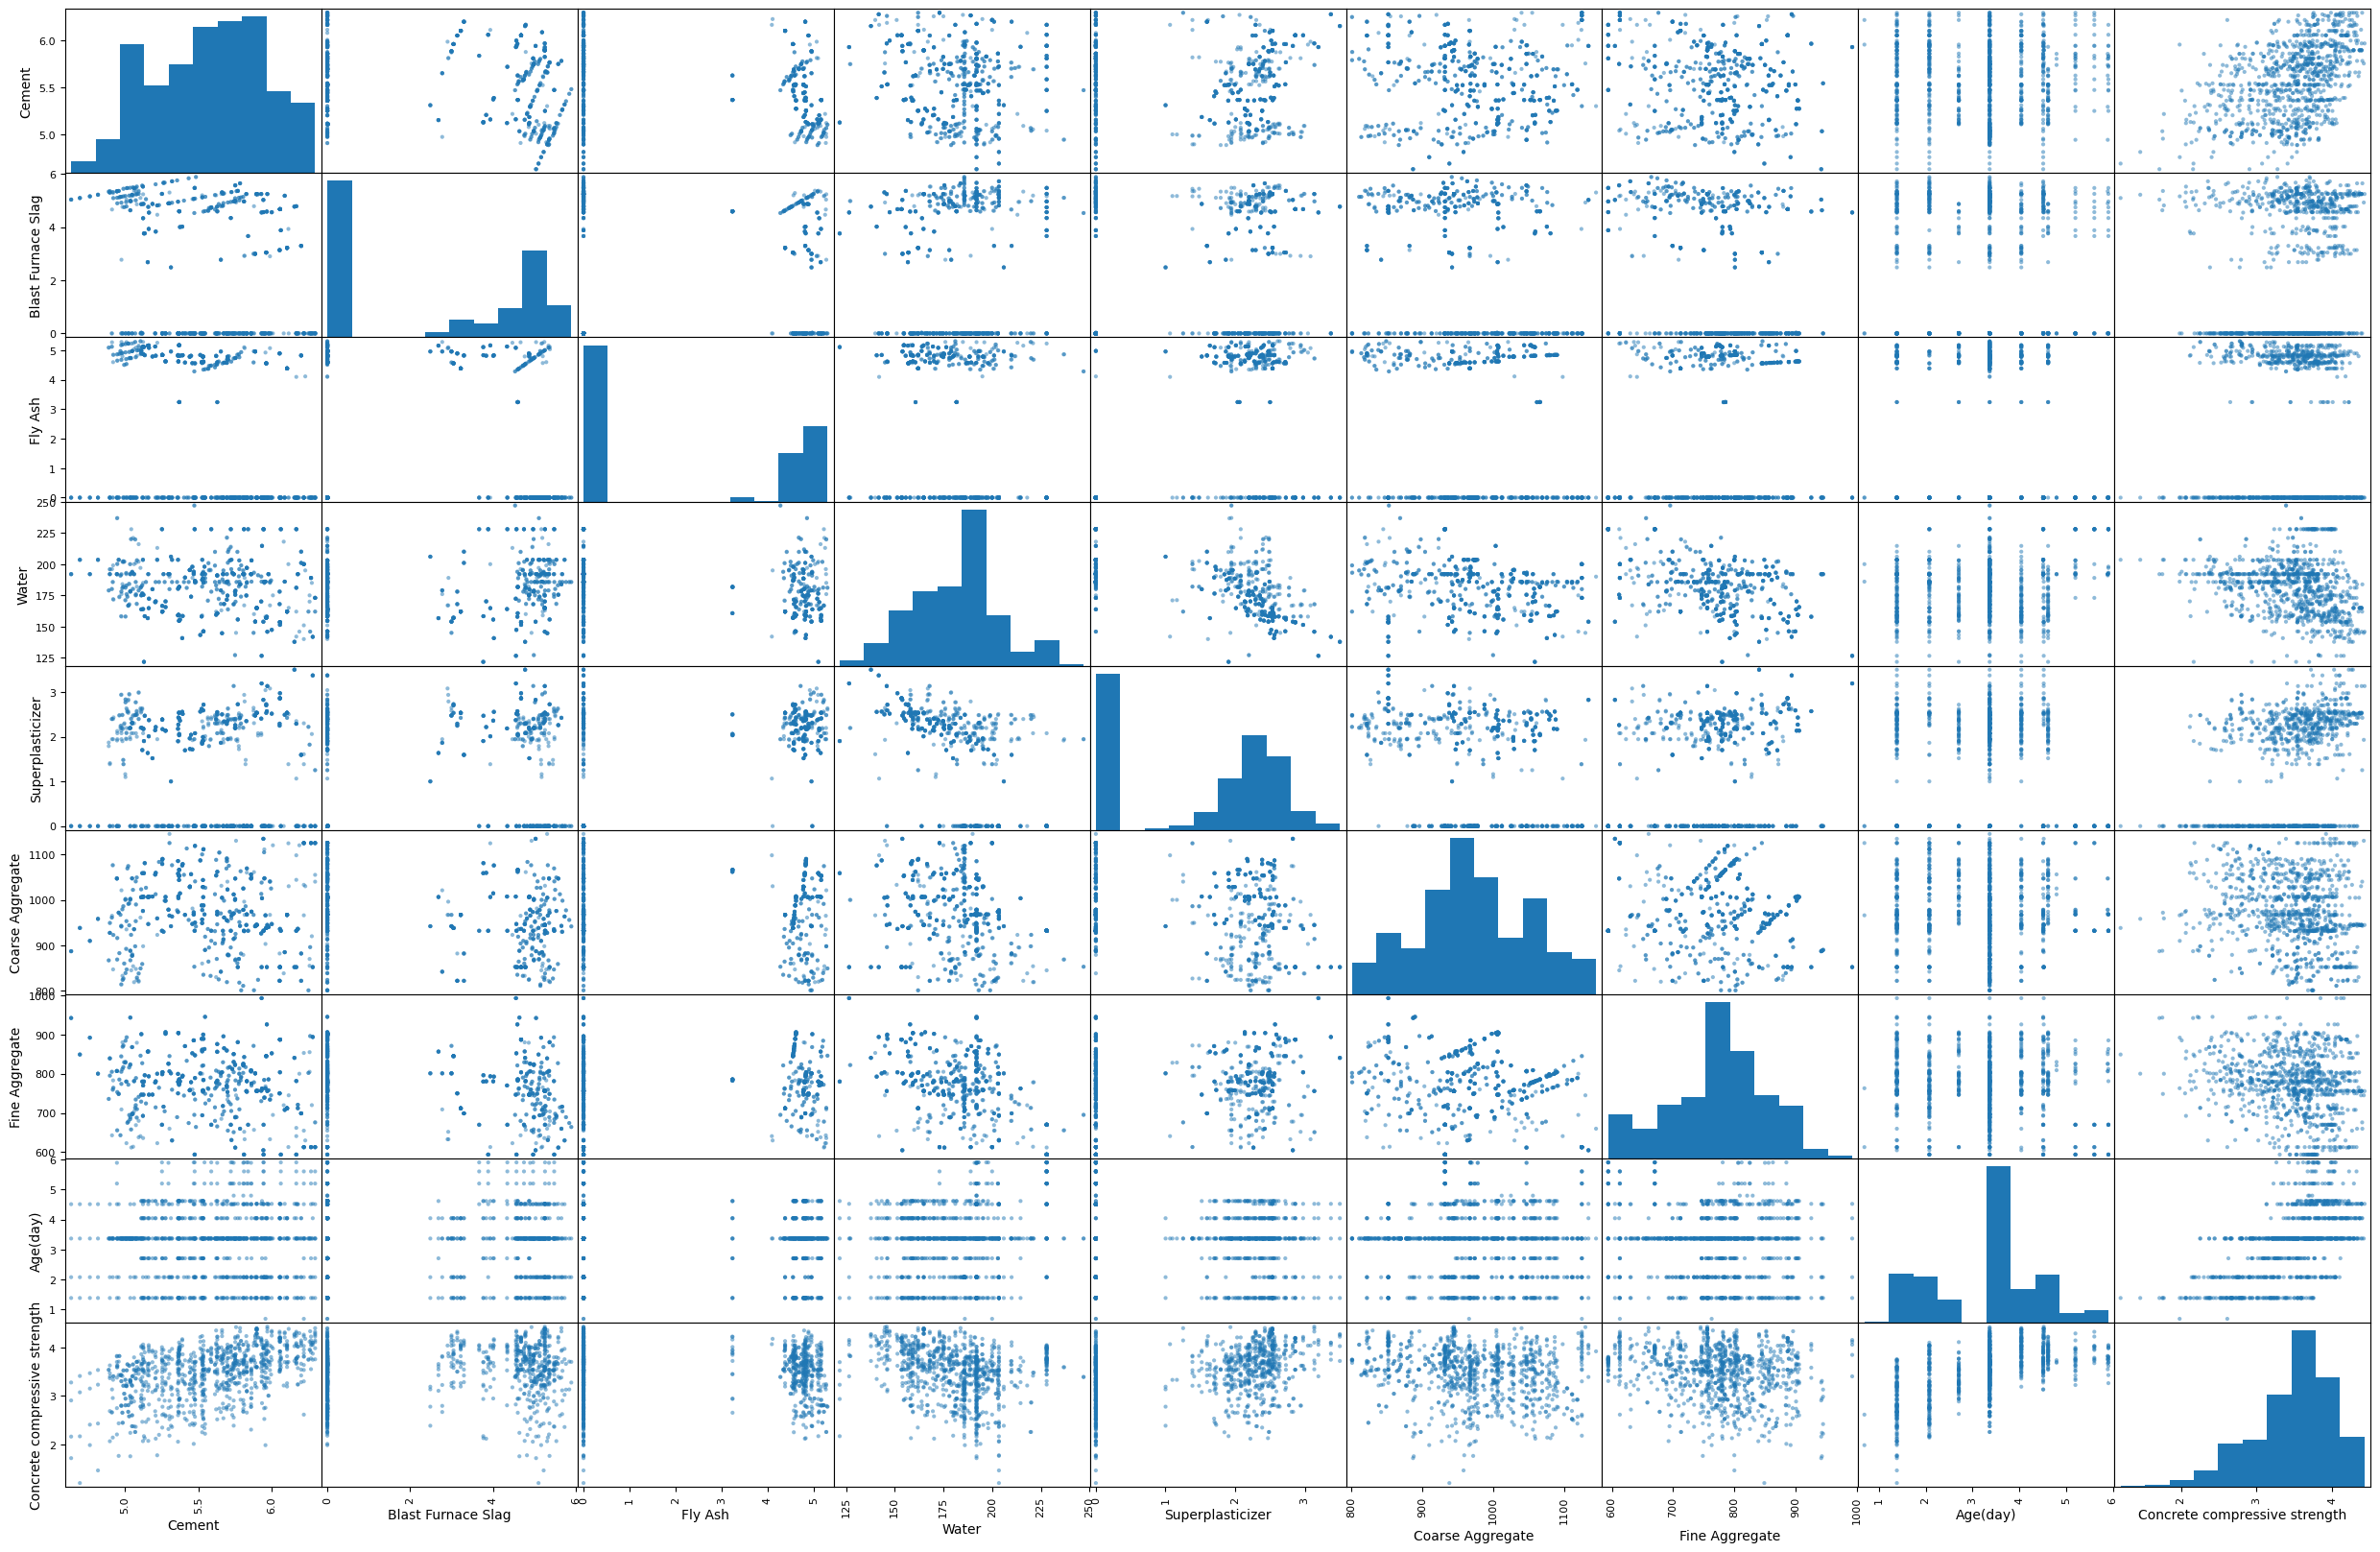

In [21]:
concrete_df_log = concrete_df.copy()
for col in ['Blast Furnace Slag', 'Fly Ash','Superplasticizer', 'Cement', 'Age(day)', 'Concrete compressive strength']:
    concrete_df_log[col] = np.log(concrete_df_log[col] + 1)
_ = scatter_matrix(concrete_df_log, figsize=(31,20))
# some columns still look odd but not as skewed anymore

In [612]:
# maybe a scaler is needed?

In [22]:
concrete_df_cbrt = concrete_df_log.copy()

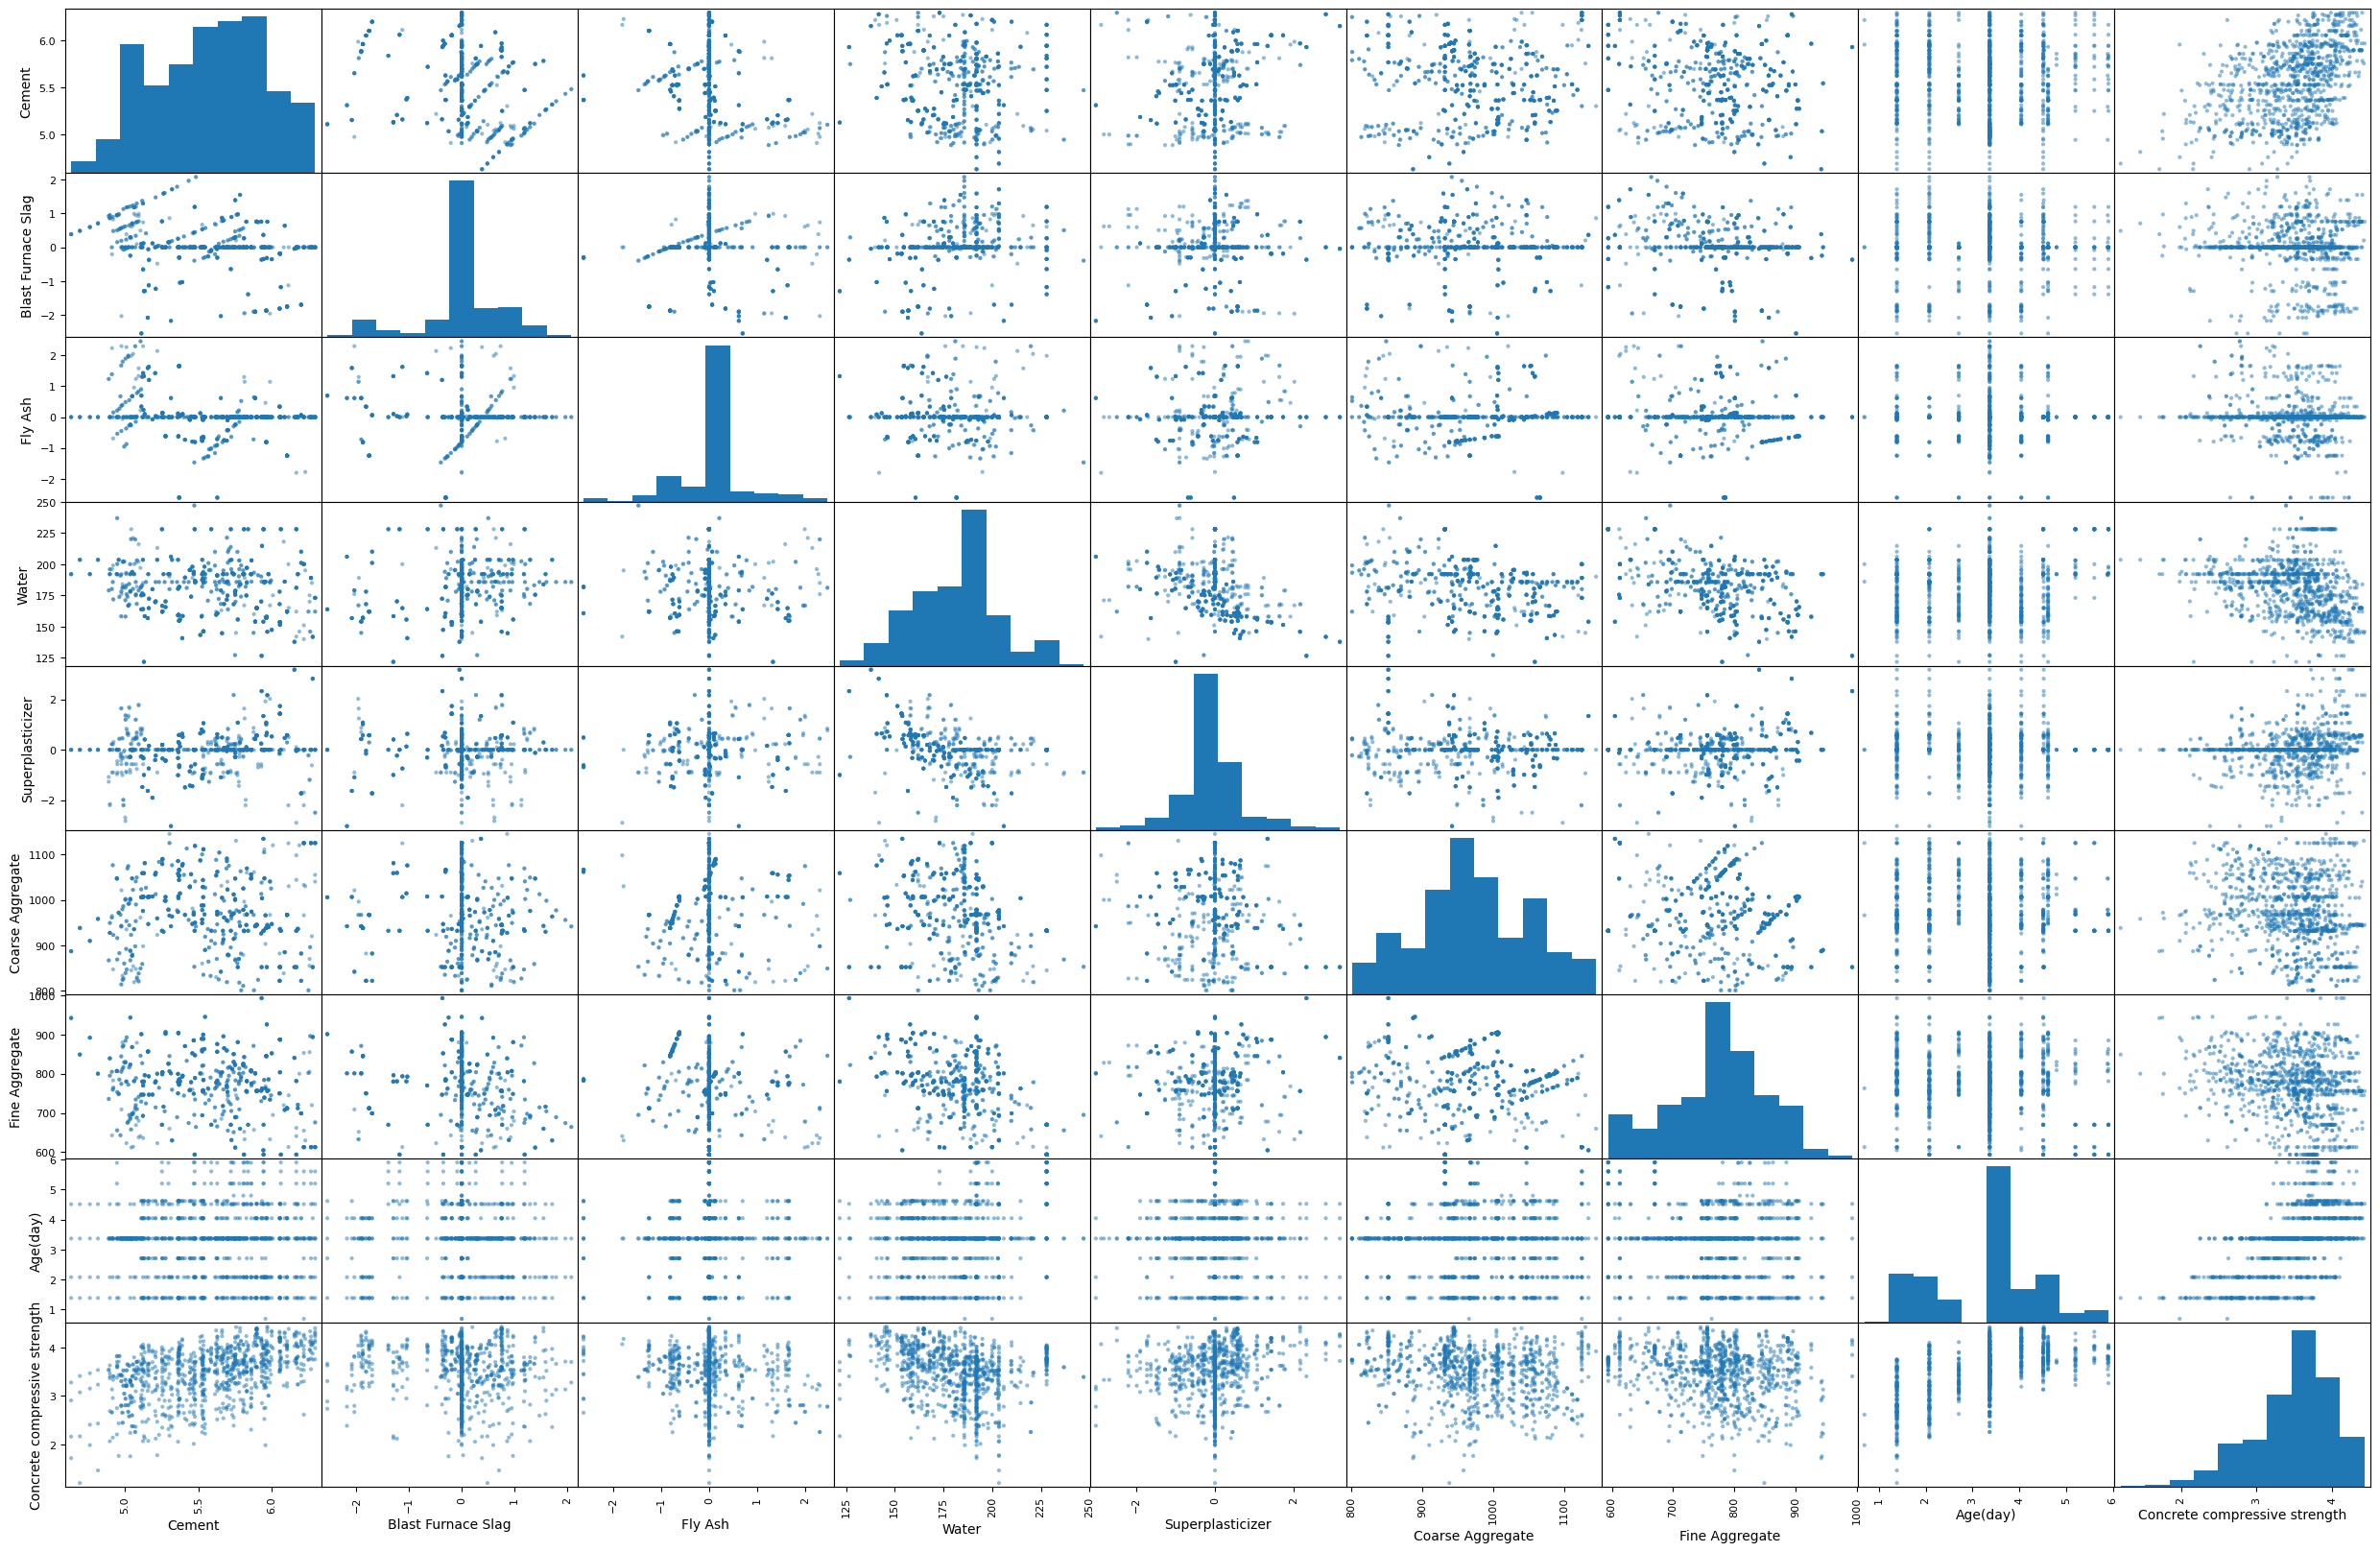

In [23]:
concrete_df_scaled = concrete_df_cbrt.copy()
# fly ash, blast furnace slag, and superplasticizer still is skewed so let's try a scaler
scaler = PowerTransformer(method='box-cox')

# apply transformation only to non-zero values
non_zero_values = concrete_df_scaled[concrete_df_scaled['Fly Ash'] > 0]

# fit the scaler on the non-zero values and transform them
concrete_df_scaled.loc[concrete_df_scaled['Fly Ash'] > 0, 'Fly Ash'] = scaler.fit_transform(non_zero_values[['Fly Ash']]).flatten()

# apply transformation only to non-zero values
s_non_zero_values = concrete_df_scaled[concrete_df_scaled['Superplasticizer'] > 0]

# fit the scaler on the non-zero values and transform them
concrete_df_scaled.loc[concrete_df_scaled['Superplasticizer'] > 0, 'Superplasticizer'] = scaler.fit_transform(s_non_zero_values[['Superplasticizer']]).flatten()

# apply transformation only to non-zero values
bfs_non_zero_values = concrete_df_scaled[concrete_df_scaled['Blast Furnace Slag'] > 0]

# fit the scaler on the non-zero values and transform them
concrete_df_scaled.loc[concrete_df_scaled['Blast Furnace Slag'] > 0, 'Blast Furnace Slag'] = scaler.fit_transform(bfs_non_zero_values[['Blast Furnace Slag']]).flatten()

_ = scatter_matrix(concrete_df_scaled, figsize=(31,20))

### Original

In [24]:
concrete_df.corr()

Cement  Blast Furnace Slag   Fly Ash  \
Cement                         1.000000           -0.275193 -0.397475   
Blast Furnace Slag            -0.275193            1.000000 -0.323569   
Fly Ash                       -0.397475           -0.323569  1.000000   
Water                         -0.081544            0.107286 -0.257044   
Superplasticizer               0.092771            0.043376  0.377340   
Coarse Aggregate              -0.109356           -0.283998 -0.009977   
Fine Aggregate                -0.222720           -0.281593  0.079076   
Age(day)                       0.081947           -0.044246 -0.154370   
Concrete compressive strength  0.497833            0.134824 -0.105753   

                                  Water  Superplasticizer  Coarse Aggregate  \
Cement                        -0.081544          0.092771         -0.109356   
Blast Furnace Slag             0.107286          0.043376         -0.283998   
Fly Ash                       -0.257044          0.377340         -0.009977   
Water                          1.000000         -0.657464         -0.182312   
Superplasticizer              -0.657464          1.000000         -0.266303   
Coarse Aggregate              -0.182312         -0.266303          1.000000   
Fine Aggregate                -0.450635          0.222501         -0.178506   
Age(day)                       0.277604         -0.192717         -0.003016   
Concrete compressive strength -0.289613          0.366102         -0.164928   

                               Fine Aggregate  Age(day)  \
Cement                              -0.222720  0.081947   
Blast Furnace Slag                  -0.281593 -0.044246   
Fly Ash                              0.079076 -0.154370   
Water                               -0.450635  0.277604   
Superplasticizer                     0.222501 -0.192717   
Coarse Aggregate                    -0.178506 -0.003016   
Fine Aggregate                       1.000000 -0.156094   
Age(day)                            -0.156094  1.000000   
Concrete compressive strength       -0.167249  0.328877   

                               Concrete compressive strength  
Cement                                              0.497833  
Blast Furnace Slag                                  0.134824  
Fly Ash                                            -0.105753  
Water                                              -0.289613  
Superplasticizer                                    0.366102  
Coarse Aggregate                                   -0.164928  
Fine Aggregate                                     -0.167249  
Age(day)                                            0.328877  
Concrete compressive strength                       1.000000

<Axes: >

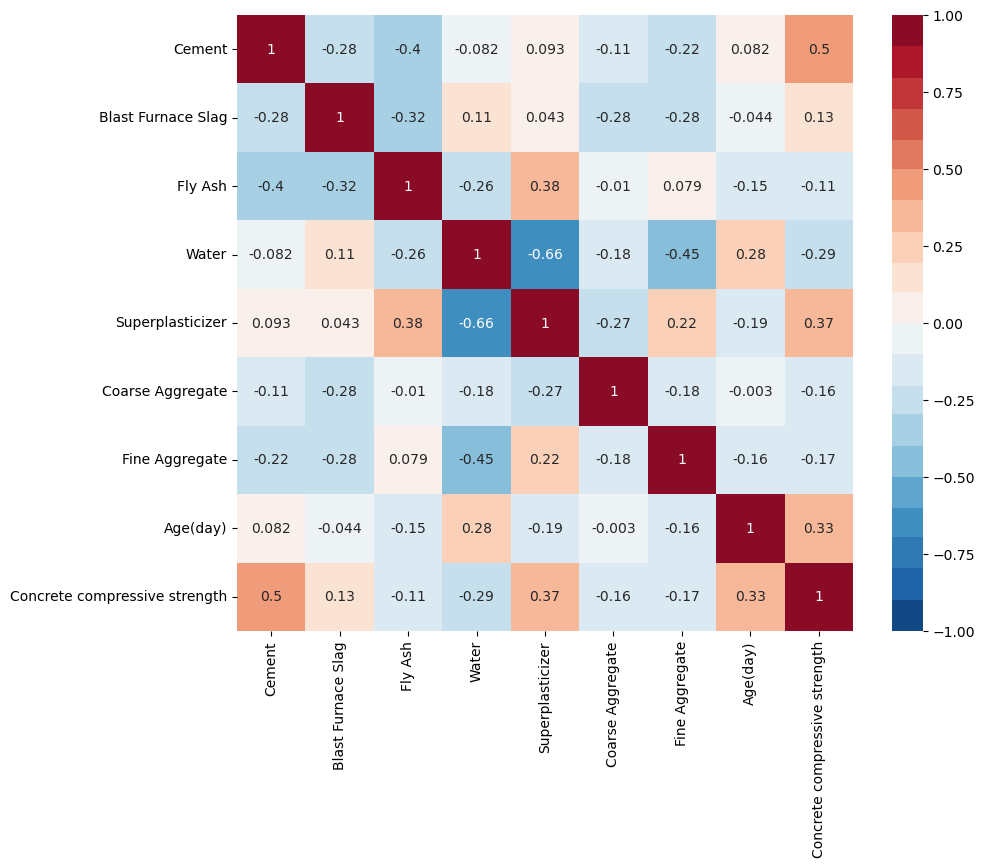

In [31]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(concrete_df.corr(), square=True, ax=ax, annot=True,
            cmap=sns.color_palette("RdBu_r", 20), center=0, vmin=-1, vmax=1)

### Log transformation

In [32]:
concrete_df_log.corr()

Cement  Blast Furnace Slag   Fly Ash  \
Cement                         1.000000           -0.236020 -0.345077   
Blast Furnace Slag            -0.236020            1.000000 -0.209748   
Fly Ash                       -0.345077           -0.209748  1.000000   
Water                         -0.080445            0.032196 -0.262752   
Superplasticizer              -0.028587            0.135126  0.591288   
Coarse Aggregate              -0.087063           -0.356707 -0.011928   
Fine Aggregate                -0.200920           -0.245895  0.113219   
Age(day)                       0.008380           -0.009523 -0.024109   
Concrete compressive strength  0.473551            0.173288 -0.018195   

                                  Water  Superplasticizer  Coarse Aggregate  \
Cement                        -0.080445         -0.028587         -0.087063   
Blast Furnace Slag             0.032196          0.135126         -0.356707   
Fly Ash                       -0.262752          0.591288         -0.011928   
Water                          1.000000         -0.613898         -0.182312   
Superplasticizer              -0.613898          1.000000         -0.235497   
Coarse Aggregate              -0.182312         -0.235497          1.000000   
Fine Aggregate                -0.450635          0.194755         -0.178506   
Age(day)                       0.170203         -0.047256         -0.038134   
Concrete compressive strength -0.244488          0.332453         -0.158930   

                               Fine Aggregate  Age(day)  \
Cement                              -0.200920  0.008380   
Blast Furnace Slag                  -0.245895 -0.009523   
Fly Ash                              0.113219 -0.024109   
Water                               -0.450635  0.170203   
Superplasticizer                     0.194755 -0.047256   
Coarse Aggregate                    -0.178506 -0.038134   
Fine Aggregate                       1.000000 -0.114854   
Age(day)                            -0.114854  1.000000   
Concrete compressive strength       -0.192232  0.590061   

                               Concrete compressive strength  
Cement                                              0.473551  
Blast Furnace Slag                                  0.173288  
Fly Ash                                            -0.018195  
Water                                              -0.244488  
Superplasticizer                                    0.332453  
Coarse Aggregate                                   -0.158930  
Fine Aggregate                                     -0.192232  
Age(day)                                            0.590061  
Concrete compressive strength                       1.000000

<Axes: >

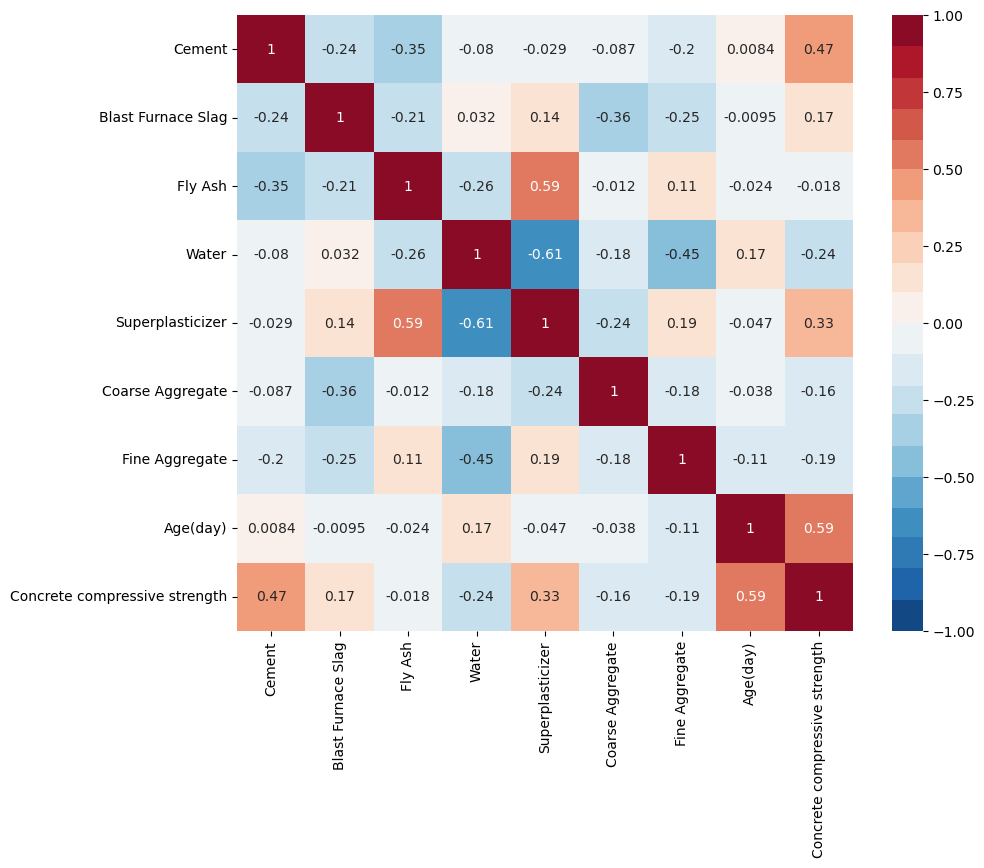

In [33]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(concrete_df_log.corr(), square=True, ax=ax, annot=True,
            cmap=sns.color_palette("RdBu_r", 20), center=0, vmin=-1, vmax=1)

### Scaler transformation

In [34]:
concrete_df_scaled.corr()

Cement  Blast Furnace Slag   Fly Ash  \
Cement                         1.000000           -0.241536 -0.249295   
Blast Furnace Slag            -0.241536            1.000000 -0.009924   
Fly Ash                       -0.249295           -0.009924  1.000000   
Water                         -0.080445            0.205545 -0.036527   
Superplasticizer               0.233368            0.073239  0.021872   
Coarse Aggregate              -0.087063           -0.010822 -0.004540   
Fine Aggregate                -0.200920           -0.166137 -0.098555   
Age(day)                       0.008380            0.006427  0.010387   
Concrete compressive strength  0.473551           -0.069604 -0.144459   

                                  Water  Superplasticizer  Coarse Aggregate  \
Cement                        -0.080445          0.233368         -0.087063   
Blast Furnace Slag             0.205545          0.073239         -0.010822   
Fly Ash                       -0.036527          0.021872         -0.004540   
Water                          1.000000         -0.390262         -0.182312   
Superplasticizer              -0.390262          1.000000         -0.135596   
Coarse Aggregate              -0.182312         -0.135596          1.000000   
Fine Aggregate                -0.450635          0.124888         -0.178506   
Age(day)                       0.170203         -0.018804         -0.038134   
Concrete compressive strength -0.244488          0.175631         -0.158930   

                               Fine Aggregate  Age(day)  \
Cement                              -0.200920  0.008380   
Blast Furnace Slag                  -0.166137  0.006427   
Fly Ash                             -0.098555  0.010387   
Water                               -0.450635  0.170203   
Superplasticizer                     0.124888 -0.018804   
Coarse Aggregate                    -0.178506 -0.038134   
Fine Aggregate                       1.000000 -0.114854   
Age(day)                            -0.114854  1.000000   
Concrete compressive strength       -0.192232  0.590061   

                               Concrete compressive strength  
Cement                                              0.473551  
Blast Furnace Slag                                 -0.069604  
Fly Ash                                            -0.144459  
Water                                              -0.244488  
Superplasticizer                                    0.175631  
Coarse Aggregate                                   -0.158930  
Fine Aggregate                                     -0.192232  
Age(day)                                            0.590061  
Concrete compressive strength                       1.000000

<Axes: >

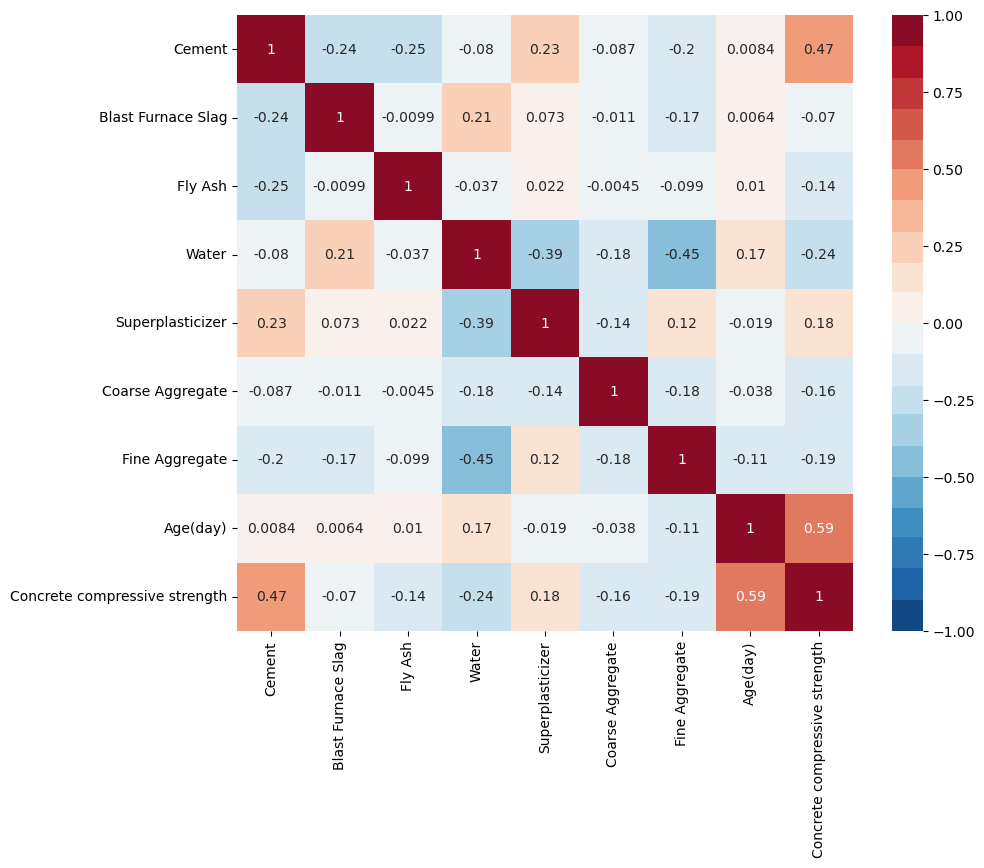

In [35]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(concrete_df_scaled.corr(), square=True, ax=ax, annot=True,
            cmap=sns.color_palette("RdBu_r", 20), center=0, vmin=-1, vmax=1)

## Step 4: Build The Model Below

### Model with original data

In [36]:
# create training and testing datasets
train_df, test_df = train_test_split(concrete_df, test_size=0.20, random_state=0)

print(train_df.shape)
print(test_df.shape)

(824, 9)
(206, 9)


In [37]:
# seperate our training data into predictors and predictand
xCols = [col for col in train_df.columns if col not in ['Concrete compressive strength']]
X_train = train_df[xCols]
y_train = train_df['Concrete compressive strength']

# seperate our testing data into predictors and predictand
X_test = test_df[xCols]
y_test = test_df['Concrete compressive strength']

# mean Standardize our data
X_train_std = (X_train - X_train.mean())/X_train.std()
X_test_std = (X_test - X_train.mean())/X_train.std()

y_train_std = (y_train - y_train.mean())/y_train.std()
y_test_std = (y_test - y_train.mean())/y_train.std()

In [38]:
linReg = LassoCV(cv=5, n_alphas=100) # using lasso method
linReg.fit(X_train_std, y_train_std)
print('Optimal Alpha: {:.6f}'.format(linReg.alpha_))

Optimal Alpha: 0.000477


In [39]:
for pred, coef in zip(X_train.columns, linReg.coef_):
    if coef != 0:
        print('{}: {:.4f}'.format(pred, coef))

Cement: 0.7296
Blast Furnace Slag: 0.5585
Fly Ash: 0.3387
Water: -0.1952
Superplasticizer: 0.1103
Coarse Aggregate: 0.0930
Fine Aggregate: 0.0962
Age(day): 0.4226


In [40]:
y_pred_std = linReg.predict(X_test_std) # create predictions on mean standardized test set
print('The MSE, on the standardized predictions, is: {:.3f}'.
      format(mean_squared_error(y_test_std, y_pred_std)))

y_pred = (y_pred_std * y_train.std()) + y_train.mean() 
print('The MSE, on the unstandardized predictions, is: {:.3f}'.
      format(mean_squared_error(y_test, y_pred)))

The MSE, on the standardized predictions, is: 0.338
The MSE, on the unstandardized predictions, is: 95.541


In [41]:
print('R^2 Score is: {:.3f}'.format((r2_score(y_test_std, y_pred_std))))


print('R^2 Score is: {:.3f}'.format((r2_score(y_test, y_pred))))

R^2 Score is: 0.637
R^2 Score is: 0.637


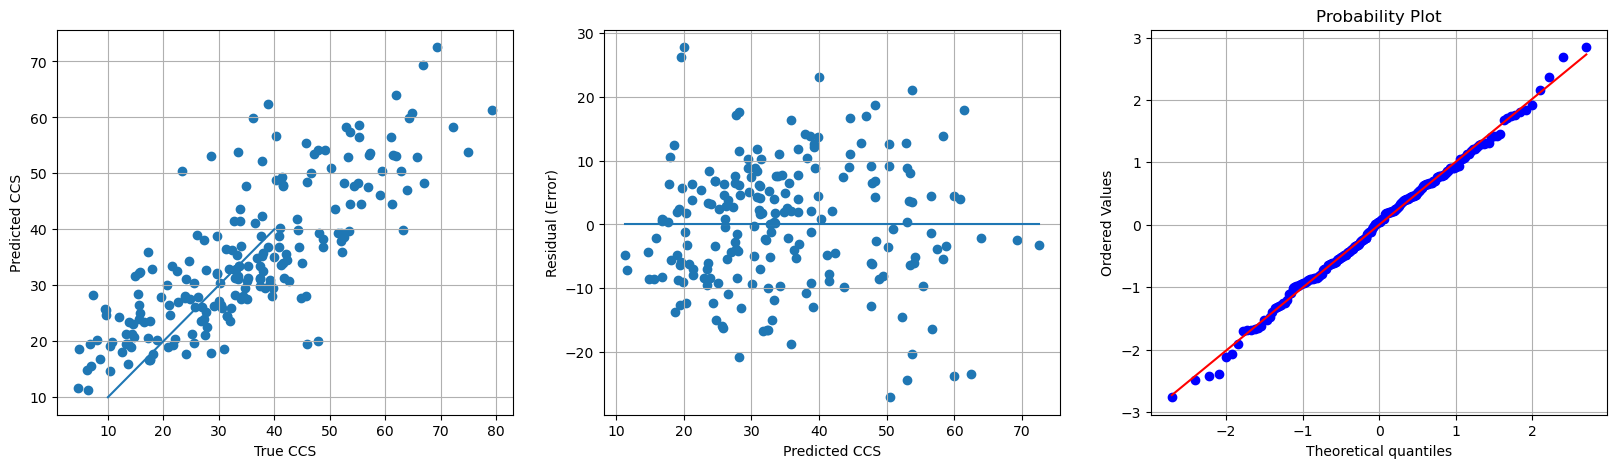

In [42]:
fig, axs = plt.subplots(1, 3, figsize=(20, 5))
axs[0].scatter(y_test, y_pred)
axs[0].plot([10, 40], [10, 40])
axs[0].set_xlabel('True CCS')
axs[0].set_ylabel('Predicted CCS')
axs[0].grid()


residuals = y_test - y_pred
axs[1].scatter(y_pred, residuals)
axs[1].plot([y_pred.min(), y_pred.max()],[0, 0])
axs[1].set_xlabel('Predicted CCS')
axs[1].set_ylabel('Residual (Error)')
axs[1].grid()

residulas_std = (residuals - residuals.mean())/residuals.std()
stats.probplot(residulas_std, dist="norm", plot=axs[2])
axs[2].grid()

### Resplit data with scaler (box-cox) transformation

In [43]:
concrete_train_scaled, concrete_test_scaled = train_test_split(concrete_df_scaled, test_size=0.2, random_state=0)

# seperate our training data into predictors and predictand
xCols = [col for col in concrete_train_scaled.columns if col not in ['Concrete compressive strength']]
X_train_scaled = concrete_train_scaled[xCols]
y_train_scaled = concrete_train_scaled['Concrete compressive strength']

# seperate our testing data into predictors and predictand
X_test_scaled = concrete_test_scaled[xCols]
y_test_scaled = concrete_test_scaled['Concrete compressive strength']


X_train_scaled_std = (X_train_scaled - X_train_scaled.mean())/X_train_scaled.std()
X_test_scaled_std = (X_test_scaled - X_train_scaled.mean())/X_train_scaled.std()

y_train_scaled_std = (y_train_scaled - y_train_scaled.mean())/y_train_scaled.std()
y_test_scaled_std = (y_test_scaled - y_train_scaled.mean())/y_train_scaled.std()

In [44]:
linReg_scaled = LassoCV(cv=5, n_alphas=100)
linReg_scaled.fit(X_train_scaled_std, y_train_scaled_std)
print('Optimal Alpha: {:.6f}'.format(linReg.alpha_))

Optimal Alpha: 0.000477


In [45]:
for pred, coef in zip(X_train_scaled.columns, linReg_scaled.coef_):
    if coef != 0:
        print('{}: {:.2f}'.format(pred,coef))

Cement: 0.34
Blast Furnace Slag: 0.09
Fly Ash: -0.12
Water: -0.63
Superplasticizer: -0.14
Coarse Aggregate: -0.31
Fine Aggregate: -0.37
Age(day): 0.65


In [46]:
y_pred_scaled_std = linReg_scaled.predict(X_test_scaled_std) # create predictions on mean standardized test set
print('The MSE, on the standardized predictions, is: {:.3f}'.
      format(mean_squared_error(y_test_scaled_std, y_pred_scaled_std)))

y_pred_scaled = (y_pred_scaled_std * y_train_scaled.std()) + y_train_scaled.mean() 
print('The MSE, on the unstandardized predictions, is: {:.3f}'.format(mean_squared_error(y_test_scaled, y_pred_scaled)))

The MSE, on the standardized predictions, is: 0.221
The MSE, on the unstandardized predictions, is: 0.060


In [47]:
y_pred_scaled_std = linReg_scaled.predict(X_test_scaled_std)
y_pred_scaled = (y_pred_scaled_std * y_train_scaled.std()) + y_train_scaled.mean()

print('The MSE, on the unstandardized predictions, is: {:.3f}'.format(mean_squared_error(y_test_scaled, y_pred_scaled)))

print('R^2 Score is: {:.3f}'.format((r2_score(y_test_scaled, y_pred_scaled))))

The MSE, on the unstandardized predictions, is: 0.060
R^2 Score is: 0.799


#### Box-cox Lasso method evaluation

In [48]:
y_pred_scaled_std = linReg_scaled.predict(X_test_scaled_std)
y_pred_scaled = (y_pred_scaled_std * y_train_scaled.std()) + y_train_scaled.mean()

y_pred_after_boxcox = scaler.inverse_transform(y_pred_scaled.reshape(-1, 1))  # reverse box-cox

# Reverse the log transformation 
y_pred_original = np.exp(y_pred_after_boxcox)

print('The MSE, on the unstandardized predictions, is: {:.3f}'.format(mean_squared_error(y_test, y_pred_original)))

print('R^2 Score is: {:.3f}'.format((r2_score(y_test, y_pred_original))))

The MSE, on the unstandardized predictions, is: 363787.415
R^2 Score is: -1380.204


In [49]:
# ^^^^ does not really work for original test data :( so let's stick with log transformed data as the r^2 score is much better

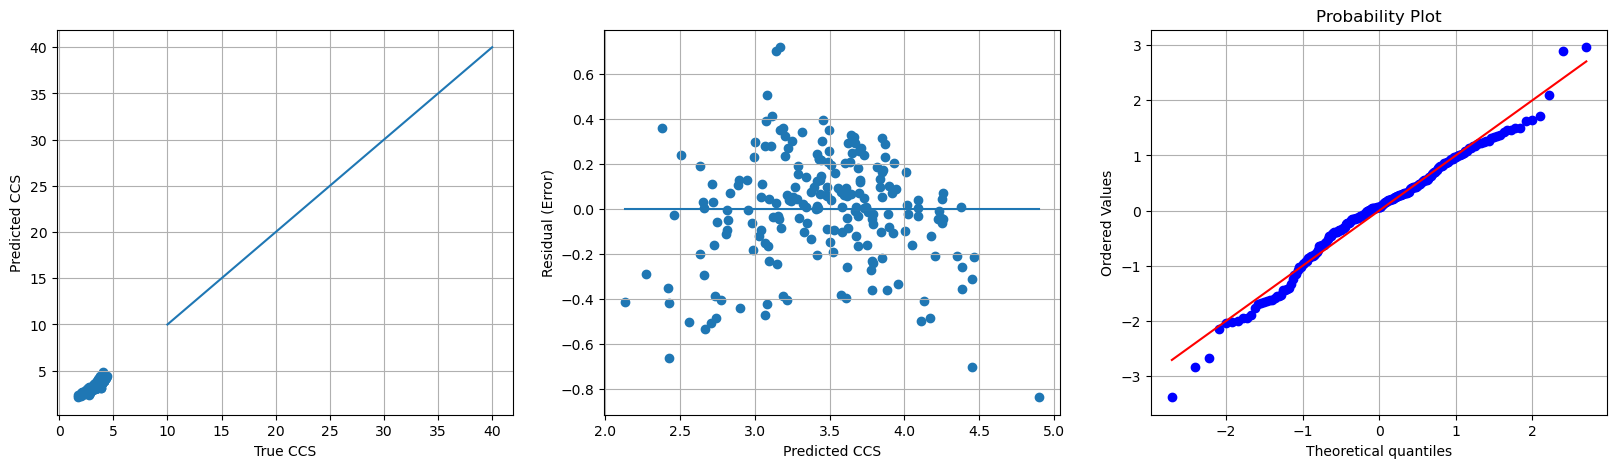

In [50]:
fig, axs = plt.subplots(1, 3, figsize=(20, 5))
axs[0].scatter(y_test_scaled, y_pred_scaled)
axs[0].plot([10, 40], [10, 40])
axs[0].set_xlabel('True CCS')
axs[0].set_ylabel('Predicted CCS')
axs[0].grid()


residuals = y_test_scaled - y_pred_scaled
axs[1].scatter(y_pred_scaled, residuals)
axs[1].plot([y_pred_scaled.min(), y_pred_scaled.max()],[0, 0])
axs[1].set_xlabel('Predicted CCS')
axs[1].set_ylabel('Residual (Error)')
axs[1].grid()

residuals_std = (residuals - residuals.mean())/residuals.std()
stats.probplot(residuals_std, dist="norm", plot=axs[2])
axs[2].grid()

### Logged data only

In [51]:
concrete_train_log, concrete_test_log = train_test_split(concrete_df_log, test_size=0.20, random_state=0)

print(concrete_train_log.shape)
print(concrete_test_log.shape)

(824, 9)
(206, 9)


In [52]:
# seperate our training data into predictors and predictand
xCols = [col for col in concrete_train_log.columns if col not in ['Concrete compressive strength']]
X_train_log = concrete_train_log[xCols]
y_train_log = concrete_train_log['Concrete compressive strength']

# seperate our testing data into predictors and predictand
X_test_log = concrete_test_log[xCols]
y_test_log = concrete_test_log['Concrete compressive strength']

# standardize the data
X_train_log_std = (X_train_log - X_train_log.mean())/X_train_log.std()
X_test_log_std = (X_test_log - X_train_log.mean())/X_train_log.std()

y_train_log_std = (y_train_log - y_train_log.mean())/y_train_log.std()
y_test_log_std = (y_test_log - y_train_log.mean())/y_train_log.std()

In [53]:
linReg_log = LassoCV(cv=5, n_alphas=100) # using the lasso method
linReg_log.fit(X_train_log_std, y_train_log_std) # fit the standardized data 
print('Optimal Alpha: {:.6f}'.format(linReg.alpha_))

Optimal Alpha: 0.000477


In [54]:
for pred, coef in zip(X_train_log.columns, linReg_log.coef_):
    if coef != 0:
        print('{}: {:.2f}'.format(pred,coef))

Cement: 0.52
Blast Furnace Slag: 0.29
Fly Ash: 0.09
Water: -0.25
Superplasticizer: 0.15
Coarse Aggregate: -0.02
Fine Aggregate: -0.10
Age(day): 0.63


### Logged data Lasso evaluation (step 5)

In [55]:
y_pred_log_std = linReg_log.predict(X_test_log_std)

y_pred_log = (y_pred_log_std * y_train_log.std()) + y_train_log.mean()
y_pred_unlog = np.exp(y_pred_log) 
y_test_unlog = np.exp(y_test_log)


print('The MSE, on the unstandardized predictions, is: {:.3f}'.format(mean_squared_error(y_test_unlog, y_pred_unlog)))

print('R^2 Score is: {:.3f}'.format((r2_score(y_test_unlog, y_pred_unlog))))
# this MSE doesn't seem great but the r^2 score is fine 

The MSE, on the unstandardized predictions, is: 69.567
R^2 Score is: 0.736


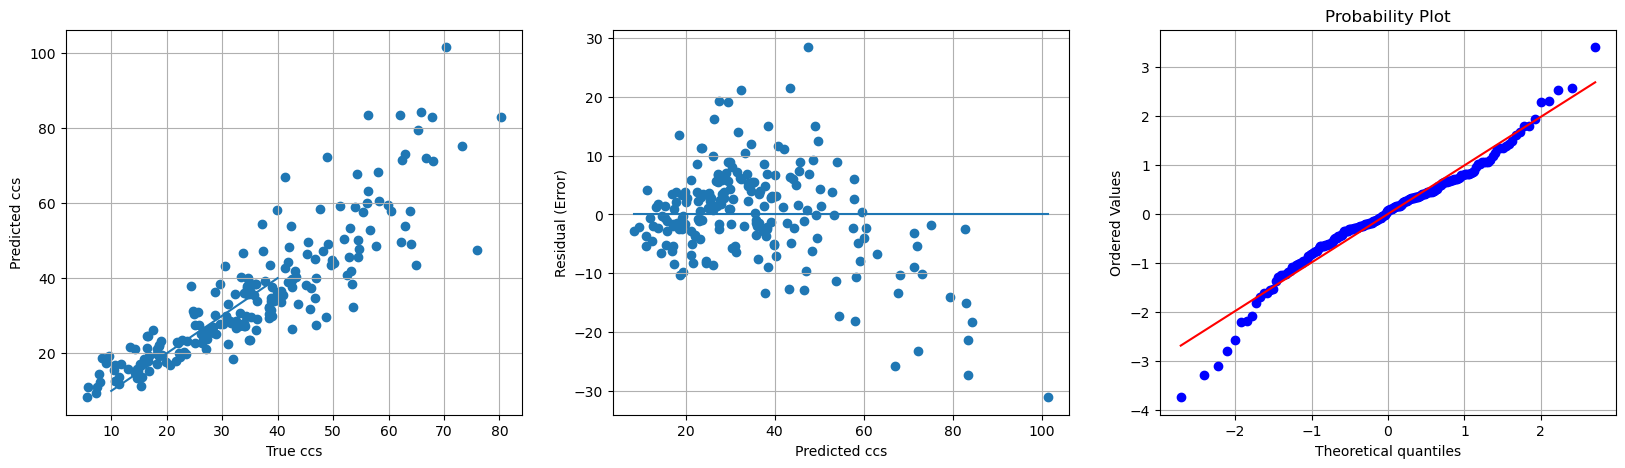

In [56]:
# scatter plot of truth vs. prediction
fig, axs = plt.subplots(1, 3, figsize=(20, 5))
axs[0].scatter(y_test_unlog, y_pred_unlog)
axs[0].plot([10, 40], [10, 40])
axs[0].set_xlabel('True ccs')
axs[0].set_ylabel('Predicted ccs')
axs[0].grid()

residuals = y_test_unlog - y_pred_unlog
axs[1].scatter(y_pred_unlog, residuals)
axs[1].plot([y_pred_unlog.min(), y_pred_unlog.max()],[0, 0])
axs[1].set_xlabel('Predicted ccs')
axs[1].set_ylabel('Residual (Error)')
axs[1].grid()

residuals_std = (residuals - residuals.mean())/residuals.std()
stats.probplot(residuals_std, dist="norm", plot=axs[2])
axs[2].grid()

## Neural Network

In [57]:
# decision tree regressor
NN = MLPRegressor(random_state=0)

parameters = {'alpha': np.arange(0.400, 0.600, 0.025)}

gsCV = GridSearchCV(NN, parameters, cv=5, return_train_score=True)

# train model
gsCV.fit(X=X_train_log_std, y=y_train_log_std)

GridSearchCV(cv=5, estimator=MLPRegressor(random_state=0),
             param_grid={'alpha': array([0.4  , 0.425, 0.45 , 0.475, 0.5  , 0.525, 0.55 , 0.575])},
             return_train_score=True)

In [58]:
print(gsCV.best_params_)
bestNN = gsCV.best_estimator_

{'alpha': 0.4}


## Step 5: Evaluate The Model Performance

### Neural network (lasso evaluations can be seen above)

In [566]:
#0.878.. much better!

In [59]:
y_NNpred_log_std = bestNN.predict(X_test_log_std)

y_NNpred_log = (y_NNpred_log_std * y_train_log.std()) + y_train_log.mean()
y_NNpred_unlog = np.exp(y_NNpred_log)

print('The MSE, on the unstandardized predictions, is: {:.3f}'.format(mean_squared_error(y_test, y_NNpred_unlog)))

print('R^2 Score is: {:.3f}'.format((r2_score(y_test, y_NNpred_unlog))))

The MSE, on the unstandardized predictions, is: 32.207
R^2 Score is: 0.878


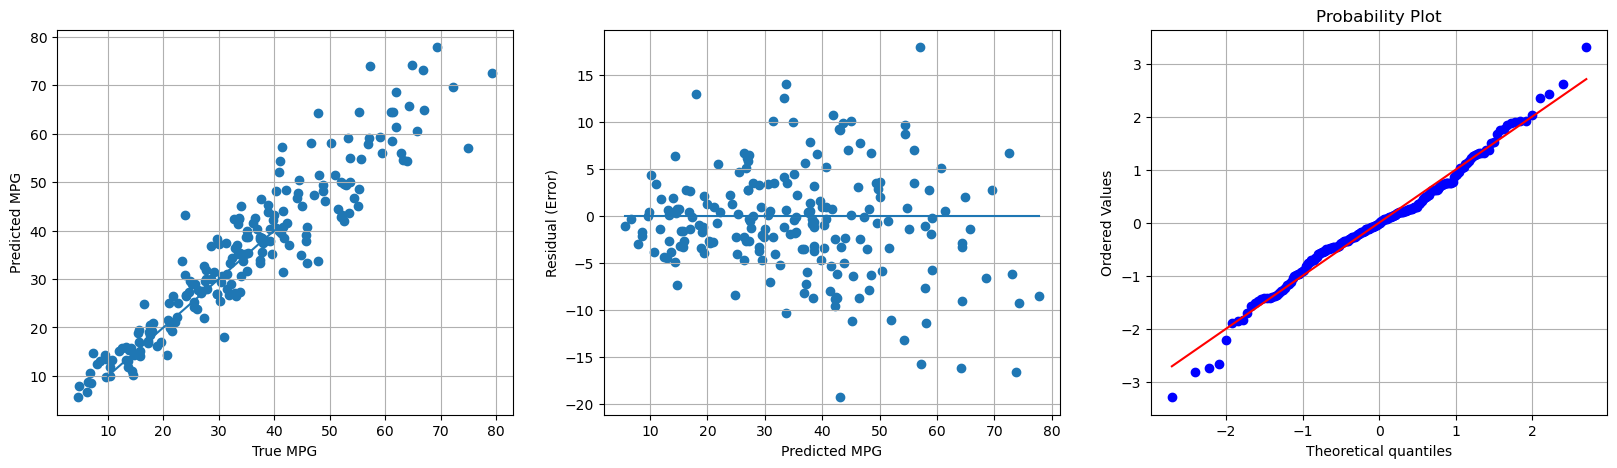

In [60]:
fig, axs = plt.subplots(1, 3, figsize=(20, 5))
axs[0].scatter(y_test, y_NNpred_unlog)
axs[0].plot([10, 40], [10, 40])

axs[0].set_xlabel('True MPG')
axs[0].set_ylabel('Predicted MPG')
axs[0].grid()

residuals = y_test - y_NNpred_unlog
axs[1].scatter(y_NNpred_unlog, residuals)
axs[1].plot([y_NNpred_unlog.min(), y_NNpred_unlog.max()],[0, 0])
axs[1].set_xlabel('Predicted MPG')
axs[1].set_ylabel('Residual (Error)')
axs[1].grid()

residulas_std = (residuals - residuals.mean())/residuals.std()
stats.probplot(residulas_std, dist="norm", plot=axs[2])
axs[2].grid()

## Step 6: Describe And Interpret The Model (Neural Network)

In [61]:
# let's do a permutation model to find the importance of each feature in the NN
feature_names = ['Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water', 'Superplasticizer', 'Coarse Aggregate', 'Fine Aggregate', 'Age(day)']

features_results = permutation_importance(gsCV, X_test, y_test, n_repeats=10, random_state=0)
CCS_feature_importance = features_results.importances_mean

for name, importance in zip(feature_names, CCS_feature_importance): # names so we can easily see important features
    print(f"{name}: {importance}")

Cement: 7.7502142484307415
Blast Furnace Slag: -0.1623276732668014
Fly Ash: 7.606406487964605
Water: 0.11305201048840523
Superplasticizer: -0.018639647273989722
Coarse Aggregate: 0.2585623433464626
Fine Aggregate: -0.9650934469330898
Age(day): 1.9439459831304053


- Cement: 7.7502142484307415
- Blast Furnace Slag: -0.1623276732668014
- Fly Ash: 7.606406487964605
- Water: 0.11305201048840523
- Superplasticizer: -0.018639647273989722
- Coarse Aggregate: 0.2585623433464626
- Fine Aggregate: -0.9650934469330898
- Age(day): 1.9439459831304053

__Cement__ and __Fly Ash__ seem to be the most important values to the model, while Blast Furnace Slag, Superplasticizer and Fine Aggregate might not be important to the model at all.

#### Do increase amounts of fly ash in concrete increase its compressive strength? Let's run a simulation!

According to the model, as fly ash increases, the compressive strength is predicted to increase. 

In [62]:
control = X_test.mean(axis=0) # make sure that all features except Fly Ash remain constant 

for fly_ash in [0, 20, 50, 80, 150]: # random range of values to test. fly ash has a min 0 to max 83 so i'm doing a range near those values
    control['Fly Ash'] = fly_ash
    predicted_strength = gsCV.predict([control])[0]
    print(f"Fly Ash: {fly_ash}, Predicted Strength: {predicted_strength}")

Fly Ash: 0, Predicted Strength: 21.15551319905154
Fly Ash: 20, Predicted Strength: 32.19321086849306
Fly Ash: 50, Predicted Strength: 48.77041490395596
Fly Ash: 80, Predicted Strength: 65.7174481785139
Fly Ash: 150, Predicted Strength: 104.83853709256302


#### How about water? If there's no water, what happens? What happens if there's a lot of water?

According to the model, the strength decreases the more water is added. The amount of water needs to be minimal.

In [63]:
control = X_test.mean(axis=0) # make sure that all features except water remain constant 

for water in [0, 20, 121, 250, 500, 1000]: # random range of values to test. water has a min 121 to max 247 in the data
    control['Water'] = water
    predicted_strength = gsCV.predict([control])[0]
    print(f"Water: {water}, Predicted Strength: {predicted_strength}")

Water: 0, Predicted Strength: 126.16611689000253
Water: 20, Predicted Strength: 118.67663366528886
Water: 121, Predicted Strength: 78.77570640363614
Water: 250, Predicted Strength: 19.944014544361877
Water: 500, Predicted Strength: -93.72978316957426
Water: 1000, Predicted Strength: -358.0042943578513


#### How about age?

According to the model, as age goes up, the strength also increases. 

In [64]:
concrete_df['Age(day)'].unique()

array([ 28, 270, 365, 360,  90, 180,   3,   7,  56,  91,  14, 100, 120,
         1])

In [65]:
control = X_test.mean(axis=0) # make sure that all features except age remain constant 

for age in [0, 1, 20, 30, 50, 75, 80, 100, 120, 155, 245, 300, 356]: # days! these are the unique values from the dataset
    control['Age(day)'] = age
    predicted_strength = gsCV.predict([control])[0]
    print(f"Age: {age}, Predicted Strength: {predicted_strength}")

Age: 0, Predicted Strength: 23.87081632928849
Age: 1, Predicted Strength: 24.45543259156329
Age: 20, Predicted Strength: 35.56314157478361
Age: 30, Predicted Strength: 41.40930419753115
Age: 50, Predicted Strength: 53.17846098203555
Age: 75, Predicted Strength: 67.89975503528028
Age: 80, Predicted Strength: 70.76518129632493
Age: 100, Predicted Strength: 81.28706386874182
Age: 120, Predicted Strength: 91.80894644115874
Age: 155, Predicted Strength: 109.54741631405442
Age: 245, Predicted Strength: 150.95804139565755
Age: 300, Predicted Strength: 175.53854182590268
Age: 356, Predicted Strength: 198.97054109165188


#### How about Blast Furnace Slag? 

According to the model, the amount of blast furnace slag from 0-220 isn't super relevant, as the strength stays relatively the same as the blast furnace slag increases. It starts increasing a bit after that, but not by as much as Fly Ash and Cement affect the strength. 

In [66]:
control = X_test.mean(axis=0) # make sure that all features except age remain constant 

for bfs in [0.000000, 1.100000, 50.900000, 80.380000, 100.999000, 156.000000, 170.000000, 222.300000, 300.200000, 359.400000]:
    control['Blast Furnace Slag'] = bfs
    predicted_strength = gsCV.predict([control])[0]
    print(f"BFS: {bfs}, Predicted Strength: {predicted_strength}")

BFS: 0.0, Predicted Strength: 51.29750310090815
BFS: 1.1, Predicted Strength: 51.277958887060535
BFS: 50.9, Predicted Strength: 50.39313902377651
BFS: 80.38, Predicted Strength: 50.23216903788342
BFS: 100.999, Predicted Strength: 50.15480872334743
BFS: 156.0, Predicted Strength: 49.808028043340975
BFS: 170.0, Predicted Strength: 49.71002431986182
BFS: 222.3, Predicted Strength: 50.099033801563195
BFS: 300.2, Predicted Strength: 53.79528020853528
BFS: 359.4, Predicted Strength: 57.89769148971614


### How about feature interactions? How do different feature values affect each other & the strength?

#### How do Fly Ash and Water interact? 

According to the heatmap below, as water increases above 140, the CCS decreases. The Fly Ash is a vital ingredient, but adding a lot of water can still decrease the strength. 

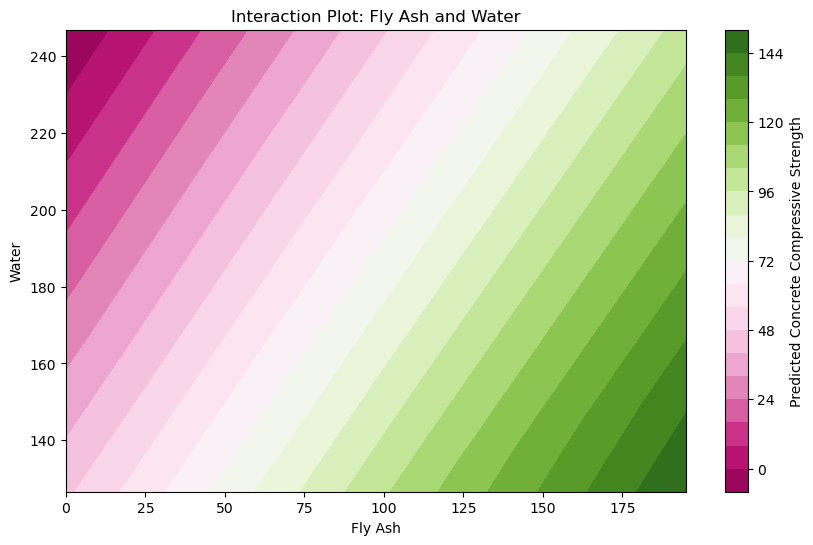

In [67]:
feature_x = 'Fly Ash' # so i can use this for other feature combos below
feature_y = 'Water'

# make a range of values for each feature
x_values = np.linspace(X_test[feature_x].min(), X_test[feature_x].max(), 50)
y_values = np.linspace(X_test[feature_y].min(), X_test[feature_y].max(), 50)

# create a grid of combinations of fly ash and water
x_grid, y_grid = np.meshgrid(x_values, y_values)

# create a baseline input with other features fixed at their mean
control = X_test.mean(axis=0)

# predict compressive strength for all combos of the two features
z_grid = np.zeros_like(x_grid)
for i in range(x_grid.shape[0]):
    for j in range(x_grid.shape[1]):
        control[feature_x] = x_grid[i, j]
        control[feature_y] = y_grid[i, j]
        z_grid[i, j] = gsCV.predict([control])[0] 

# heatmap
plt.figure(figsize=(10, 6))
plt.contourf(x_grid, y_grid, z_grid, levels=20, cmap="PiYG")
plt.colorbar(label="Predicted Concrete Compressive Strength")
plt.xlabel(feature_x)
plt.ylabel(feature_y)
plt.title(f"Interaction Plot: {feature_x} and {feature_y}")
plt.show()

#### How about Fly Ash and Superplasticizer?

Again, Fly Ash is the most vital ingredient. However, unlike water, when there's increased Superplasticizer it actually increases the CCS. These two work well together.

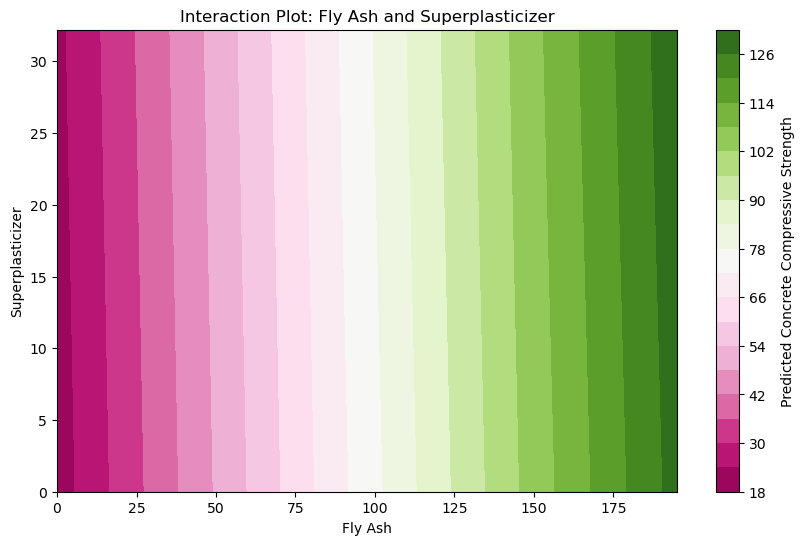

In [68]:
feature_x = 'Fly Ash' # so i can use this for other feature combos below
feature_y = 'Superplasticizer'

# make a range of values for each feature
x_values = np.linspace(X_test[feature_x].min(), X_test[feature_x].max(), 50)
y_values = np.linspace(X_test[feature_y].min(), X_test[feature_y].max(), 50)

# create a grid of combinations of fly ash and water
x_grid, y_grid = np.meshgrid(x_values, y_values)

# create a baseline input with other features fixed at their mean
control = X_test.mean(axis=0)

# predict compressive strength for all combos of the two features
z_grid = np.zeros_like(x_grid)
for i in range(x_grid.shape[0]):
    for j in range(x_grid.shape[1]):
        control[feature_x] = x_grid[i, j]
        control[feature_y] = y_grid[i, j]
        z_grid[i, j] = gsCV.predict([control])[0] 

# heatmap
plt.figure(figsize=(10, 6))
plt.contourf(x_grid, y_grid, z_grid, levels=20, cmap="PiYG") # my favorite colors
plt.colorbar(label="Predicted Concrete Compressive Strength")
plt.xlabel(feature_x)
plt.ylabel(feature_y)
plt.title(f"Interaction Plot: {feature_x} and {feature_y}")
plt.show()

#### How about Fly Ash and Cement?

This heatmap shows how important Cement is to Fly Ash. Even with Fly Ash at its highest value, the CCS is still at/around 0, and doesn't increase until enough cement is added. 

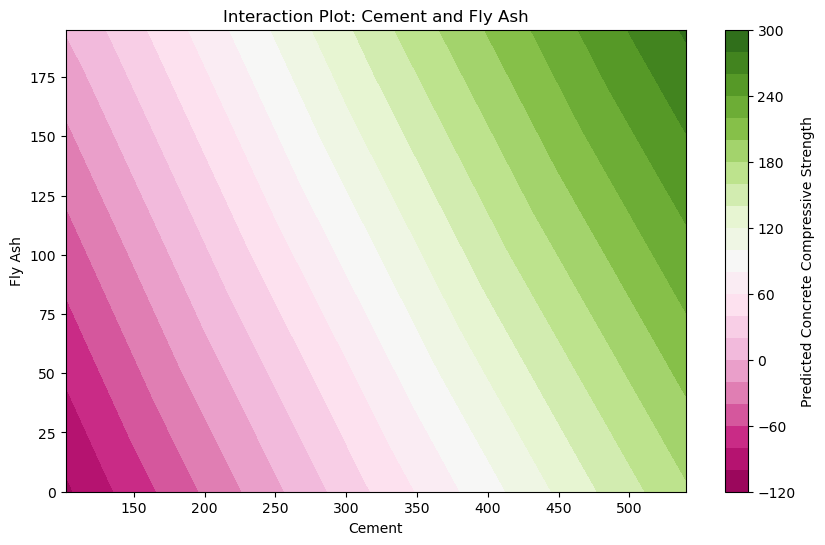

In [69]:
feature_x = 'Cement' # so i can use this for other feature combos below
feature_y = 'Fly Ash'

# make a range of values for each feature
x_values = np.linspace(X_test[feature_x].min(), X_test[feature_x].max(), 50)
y_values = np.linspace(X_test[feature_y].min(), X_test[feature_y].max(), 50)

# create a grid of combinations of fly ash and water
x_grid, y_grid = np.meshgrid(x_values, y_values)

# create a baseline input with other features fixed at their mean
control = X_test.mean(axis=0)

# predict compressive strength for all combos of the two features
z_grid = np.zeros_like(x_grid)
for i in range(x_grid.shape[0]):
    for j in range(x_grid.shape[1]):
        control[feature_x] = x_grid[i, j]
        control[feature_y] = y_grid[i, j]
        z_grid[i, j] = gsCV.predict([control])[0] 

# heatmap
plt.figure(figsize=(10, 6))
plt.contourf(x_grid, y_grid, z_grid, levels=20, cmap="PiYG") # my favorite colors
plt.colorbar(label="Predicted Concrete Compressive Strength")
plt.xlabel(feature_x)
plt.ylabel(feature_y)
plt.title(f"Interaction Plot: {feature_x} and {feature_y}")
plt.show()

### Reflection

In conclusion, the different ingredients of concrete seem to work together in various ways. Fly Ash and Cement are the most vital ingredients. 

After reflecting on this project, I found that the box-cox method did not work because the box-cox transform method was never performed on the target y variable. In the future, I would be interested in redoing this part to see how this method performs in comparison to the one I ended up choosing.